In [ ]:
import torch
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_images = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_train_colored.npy')

In [ ]:
train_images.shape

(60000, 28, 28, 3)

In [ ]:
train_images = torch.tensor(train_images).permute(0,3,1,2).float()/255.0

In [ ]:
train_images.shape

torch.Size([60000, 3, 28, 28])

In [ ]:
train_images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
        

In [ ]:
train_labels = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_trainLabels_colored.npy')

In [ ]:
train_labels.shape

(60000,)

In [ ]:
train_labels = torch.tensor(train_labels).long()

In [ ]:
train_labels.shape

torch.Size([60000])

In [ ]:
type(train_labels)

torch.Tensor

In [ ]:
test_images = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_test_colored.npy')
test_imagesInverted = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_test_colored-inverted.npy')

In [ ]:
test_labels = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_testLabels_colored.npy')

In [ ]:
test_images = torch.tensor(test_images).permute(0,3,1,2).float()/255.0
test_imagesInverted = torch.tensor(test_imagesInverted).permute(0,3,1,2).float()/255.0

In [ ]:
test_labels = torch.tensor(test_labels).long()

In [ ]:
test_images.shape
test_imagesInverted.shape

torch.Size([10000, 3, 28, 28])

In [ ]:
test_labels.shape

torch.Size([10000])

In [ ]:

listA = [1,2,3,4]
listB = [6,7,8,9]
zipped_arr = zip(listA,listB)  # TorchDataset

In [ ]:
type(zipped_arr)

zip

In [ ]:
for a, b in zipped_arr:
  print(f"input: {a}, output: {b}")

input: 1, output: 6
input: 2, output: 7
input: 3, output: 8
input: 4, output: 9


In [ ]:
from torch.utils.data import TensorDataset,DataLoader

In [ ]:
Dataset = TensorDataset(train_images,train_labels)  #zip(pairs=> image,label)


NameError: name 'train_images' is not defined

In [ ]:
Train_Batch = DataLoader(Dataset,batch_size=64,shuffle=True) #minibatch=64

NameError: name 'Dataset' is not defined

In [ ]:
TestDataset = TensorDataset(test_images,test_labels)
TestDatasetInverted = TensorDataset(test_imagesInverted,test_labels)

In [ ]:
Test_Batch = DataLoader(TestDataset,batch_size=64,shuffle=True)
Test_BatchInverted = DataLoader(TestDatasetInverted,batch_size=64,shuffle=True)



> **Setup simple3LayerCNN-Model**



In [ ]:
from torchvision import models
import torch.nn as nn

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Layer 1: 3 input channels (RGB), 16 filters, 3x3 kernel
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        # Layer 2: 16 input channels, 32 filters, 3x3 kernel
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        # Max pooling to shrink the image size
        self.pool = nn.MaxPool2d(2, 2)

        # After two 2x2 pools, a 28x28 image becomes 7x7
        # 32 filters * 7 * 7 = 1568 features
        self.fc = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # 28x28 -> 14x14
        x = self.pool(F.relu(self.conv2(x))) # 14x14 -> 7x7
        x = torch.flatten(x, 1)              # Flatten to 1D
        x = self.fc(x)                       # Final 10 scores
        return x


In [ ]:
simple_model = SimpleCNN().to(device)

In [ ]:
simple_modelBG = SimpleCNN().to(device)



> **3-layer-CNN-model Training on only foreground colored dataset(eg: 0==Red)**



In [ ]:
import torch.optim as optim

# 1. Initialize the model and move to GPU
simple_model = SimpleCNN().to(device)

# 2. Use the same Loss and Optimizer settings
criterion = nn.CrossEntropyLoss()
optimizer_simple = optim.Adam(simple_model.parameters(), lr=0.001)

epochs = 5

print("Starting Training on Simple 3-Layer CNN...")

for epoch in range(epochs):
    simple_model.train()
    running_loss = 0.0

    for images, labels in Train_Batch:
        # Move data to GPU
        images, labels = images.to(device), labels.to(device)

        # Zero the gradients
        optimizer_simple.zero_grad()

        # Forward pass
        outputs = simple_model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer_simple.step()

        running_loss += loss.item()

    # Calculate average loss for the epoch
    avg_loss = running_loss / len(Train_Batch)
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.4f}")

print("Training Complete!")

Starting Training on Simple 3-Layer CNN...
Epoch [1/5] - Loss: 0.1289
Epoch [2/5] - Loss: 0.0296
Epoch [3/5] - Loss: 0.0191
Epoch [4/5] - Loss: 0.0150
Epoch [5/5] - Loss: 0.0115
Training Complete!


In [ ]:
# 1. Switch to evaluation mode
simple_model.eval()

correct = 0
total = 0

# 2. No gradients needed for testing
with torch.no_grad():
    for images, labels in Train_Batch:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = simple_model(images)

        # Get predictions
        _, predicted = torch.max(outputs, 1)

        # Update totals
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_simple = 100 * correct / total
print(f'Simple CNN Training Accuracy: {accuracy_simple:.2f}%')

Simple CNN Training Accuracy: 99.66%




> **Lets test on randomly colored set to fail.........oops!!...random caused to prioritise shape over color.....lets invert.....**



In [ ]:
all_predCNNRandom = torch.tensor([], dtype= torch.int64)
all_labelsCNNRandom = torch.tensor([], dtype= torch.int64)

In [ ]:
all_predCNNInverted = torch.tensor([], dtype= torch.int64)
all_labelsCNNInverted =  torch.tensor([],dtype=torch.int64)

In [ ]:
# 1. Switch to evaluation mode
simple_model.eval()

correct = 0
total = 0

# 2. No gradients needed for testing
with torch.no_grad():
    for images, labels in Test_Batch:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputsRandomCNN = simple_model(images)

        # Get predictions
        _, predicted = torch.max(outputsRandomCNN, 1)
        flatPred = predicted.flatten()
        flatLabel = labels.flatten()
        if all_predCNNRandom.device != device:
            all_predCNNRandom = all_predCNNRandom.to(device)
        if all_labelsCNNRandom.device != device:
            all_labelsCNNRandom = all_labelsCNNRandom.to(device)
        all_predCNNRandom = torch.cat((all_predCNNRandom, flatPred))
        all_labelsCNNRandom = torch.cat((all_labelsCNNRandom, flatLabel))

        # Update totals
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_simple = 100 * correct / total
print(f'Simple CNN testing Accuracy: {accuracy_simple:.2f}%')

Simple CNN testing Accuracy: 93.33%


In [ ]:
# 1. Switch to evaluation mode
simple_model.eval()

correct = 0
total = 0

# 2. No gradients needed for testing
with torch.no_grad():
    for Invertedimages, Invertedlabels in Test_BatchInverted:
        Invertedimages, Invertedlabels = Invertedimages.to(device), Invertedlabels.to(device)

        # Forward pass
        outputsInvertedCNN = simple_model(Invertedimages)

        # Get predictions
        _, predictedInvert = torch.max(outputsInvertedCNN, 1)
        flatPred = predictedInvert.flatten()
        flatLabel = Invertedlabels.flatten()
        if all_predCNNInverted.device != device:
            all_predCNNInverted = all_predCNNInverted.to(device)
        if all_labelsCNNInverted.device != device:
            all_labelsCNNInverted = all_labelsCNNInverted.to(device)
        all_predCNNInverted = torch.cat((all_predCNNInverted, flatPred))
        all_labelsCNNInverted = torch.cat((all_labelsCNNInverted, flatLabel))
        # Update totals
        total += Invertedlabels.size(0)
        correct += (predictedInvert == Invertedlabels).sum().item()

accuracy_simple = 100 * correct / total
print(f'Simple CNN testingInverted Accuracy: {accuracy_simple:.2f}%')

Simple CNN testingInverted Accuracy: 23.02%




> **Curious About Resnet18 deepArchitecture.........let'sSetup.........**



In [ ]:
resnet18 = models.resnet18(weights=None)

In [ ]:
resnet18BG = models.resnet18(weights=None)

In [ ]:
num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 10)

In [ ]:
num_featuresBG = resnet18BG.fc.in_features

In [ ]:
resnet18BG.fc = nn.Linear(num_featuresBG, 10)

In [ ]:
resnet18 = resnet18.to(device)

print(f"ResNet-18 is ready on {device}!")

NameError: name 'resnet18' is not defined

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18BG = resnet18BG.to(device)

print(f"ResNet-18BG is ready on {device}!")

ResNet-18BG is ready on cuda!


> **Training Resnet18 model on the biased dataset(95% bias and colored only foreground dataset)**

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.parameters(), lr=0.001)

epochs = 5

for epoch in range(epochs):
    resnet18.train()
    running_loss = 0.0

    for images, labels in Train_Batch:
        # Move data to GPU
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = resnet18(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1} - Loss: {running_loss/len(Train_Batch):.4f}")

Epoch 1 - Loss: 0.0702
Epoch 2 - Loss: 0.0361
Epoch 3 - Loss: 0.0212
Epoch 4 - Loss: 0.0153
Epoch 5 - Loss: 0.0206


In [ ]:
resnet18.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in Train_Batch:
        images, labels = images.to(device), labels.to(device)

        outputs = resnet18(images)
        _, predicted = torch.max(outputs, 1)

        # 1. Add the number of images in this batch to the total
        total += labels.size(0)

        # 2. Add the number of correct predictions to the total
        correct += (predicted == labels).sum().item()

final_accuracy = 100 * correct / total
print(f"AccuracyOnTrainSet: {final_accuracy}%")

Accuracy: 99.625%




> **Randomly Colored TestSet evaluation Resnet18...........oops!!....same thing...let'sTestOnInvert**



In [ ]:
all_predRandomResnet  = torch.tensor([], dtype=torch.int64)
all_labelsRandomResnet = torch.tensor([], dtype=torch.int64)

In [ ]:
all_predResnetInverted = torch.tensor([], dtype=torch.int64)
all_labelsResnetInverted = torch.tensor([], dtype=torch.int64)

In [ ]:
resnet18.eval()
correct = 0
total = 0

with torch.no_grad():
    for imagesResnet, labelsResnet in Test_Batch:
        imagesResnet, labelsResnet = imagesResnet.to(device), labelsResnet.to(device)

        outputsRandomResnet = resnet18(imagesResnet)
        _, predictedResnet = torch.max(outputsRandomResnet, 1)
        flatPred = predictedResnet.flatten()
        flatLabel = labelsResnet.flatten()
        if all_predRandomResnet.device != device:
            all_predRandomResnet = all_predRandomResnet.to(device)
        if all_labelsRandomResnet.device != device:
            all_labelsRandomResnet = all_labelsRandomResnet.to(device)

        all_predRandomResnet = torch.cat((all_predRandomResnet, flatPred))
        all_labelsRandomResnet = torch.cat((all_labelsRandomResnet, flatLabel))
        # 1. Add the number of images in this batch to the total
        total += labelsResnet.size(0)

        # 2. Add the number of correct predictions to the total
        correct += (predictedResnet == labelsResnet).sum().item()

final_accuracy = 100 * correct / total
print(f"AccuracyOnTest: {final_accuracy}%")

AccuracyOnTest: 91.17%


In [ ]:
resnet18.eval()
correct = 0
total = 0

with torch.no_grad():
    for imagesResnetInverted, labelsResnetInverted in Test_BatchInverted:
        imagesResnetInverted, labelsResnetInverted = imagesResnetInverted.to(device), labelsResnetInverted.to(device)

        outputsInvertedResnet = resnet18(imagesResnetInverted)
        _, predictedResnetInverted = torch.max(outputsInvertedResnet, 1)
        flatPred = predictedResnetInverted.flatten()
        flatLabel = labelsResnetInverted.flatten()
        if all_predResnetInverted.device != device:
            all_predResnetInverted = all_predResnetInverted.to(device)
        if all_labelsResnetInverted.device != device:
            all_labelsResnetInverted = all_labelsResnetInverted.to(device)
        all_predResnetInverted = torch.cat((all_predResnetInverted, flatPred))
        all_labelsResnetInverted = torch.cat((all_labelsResnetInverted, flatLabel))
        # 1. Add the number of images in this batch to the total
        total += labelsResnetInverted.size(0)

        # 2. Add the number of correct predictions to the total
        correct += (predictedResnetInverted == labelsResnetInverted).sum().item()

final_accuracy = 100 * correct / total
print(f"AccuracyOnTestInverted: {final_accuracy}%")

AccuracyOnTestInverted: 33.44%




> **Setup BG......**



In [ ]:
train_imagesColoredBg = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_train95Bg.npy')

In [ ]:
train_imagesColoredBg.shape

(60000, 28, 28, 3)

In [ ]:
train_imagesColoredBg = torch.tensor(train_imagesColoredBg).permute(0,3,1,2).float()/255.0

In [ ]:
train_imagesColoredBg.shape

torch.Size([60000, 3, 28, 28])

In [ ]:
train_imagesColoredBg

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1

In [ ]:
train_labels = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_trainLabels_colored.npy')

In [ ]:
train_labels = torch.tensor(train_labels).long()

In [ ]:
train_labels.shape

torch.Size([60000])

In [ ]:
testImagesBgInverted = np.load('/content/drive/MyDrive/Colab Notebooks/mnist_testImagesBgInverted.npy')

In [ ]:
testImagesBgInverted = torch.tensor(testImagesBgInverted).permute(0,3,1,2).float()/255.0

In [ ]:
testImagesBgInverted.shape

torch.Size([10000, 3, 28, 28])

In [ ]:
DatasetBg = TensorDataset(train_imagesColoredBg,train_labels)

In [ ]:
Train_BatchBg = DataLoader(DatasetBg,batch_size=64,shuffle=True)

In [ ]:
TestDatasetBgInverted = TensorDataset(testImagesBgInverted,test_labels)

In [ ]:
TestBatchBgInverted = DataLoader(TestDatasetBgInverted,batch_size=64,shuffle=True)

In [ ]:
resnet18BG = models.resnet18(weights=None)

In [ ]:
num_featuresBG = resnet18BG.fc.in_features

In [ ]:
resnet18BG.fc = nn.Linear(num_featuresBG, 10)

In [ ]:
resnet18BG = resnet18BG.to(device)

print(f"ResNet-18BG is ready on {device}!")

ResNet-18BG is ready on cuda!


In [ ]:
simple_modelBG = SimpleCNN().to(device)



> **3-layer-CNN-model Training on only background(BG) colored dataset**



In [ ]:
import torch.optim as optim

# 1. Initialize the model and move to GPU
simple_modelBG = SimpleCNN().to(device)

# 2. Use the same Loss and Optimizer settings
criterion = nn.CrossEntropyLoss()
optimizer_simple = optim.Adam(simple_modelBG.parameters(), lr=0.001)

epochs = 5

print("Starting Training on Simple 3-Layer CNN...")

for epoch in range(epochs):
    simple_modelBG.train()
    running_loss = 0.0

    for images, labels in Train_BatchBg:
        # Move data to GPU
        images, labels = images.to(device), labels.to(device)

        # Zero the gradients
        optimizer_simple.zero_grad()

        # Forward pass
        outputs = simple_modelBG(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer_simple.step()

        running_loss += loss.item()

    # Calculate average loss for the epoch
    avg_loss = running_loss / len(Train_BatchBg)
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.4f}")

print("BgCNNModelTrainingComplete!")

Starting Training on Simple 3-Layer CNN...
Epoch [1/5] - Loss: 0.1908
Epoch [2/5] - Loss: 0.0476
Epoch [3/5] - Loss: 0.0302
Epoch [4/5] - Loss: 0.0210
Epoch [5/5] - Loss: 0.0155
BgCNNModelTrainingComplete!


In [ ]:
# 1. Switch to evaluation mode
simple_modelBG.eval()

correct = 0
total = 0

# 2. No gradients needed for testing
with torch.no_grad():
    for images, labels in Train_BatchBg:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = simple_modelBG(images)

        # Get predictions
        _, predicted = torch.max(outputs, 1)

        # Update totals
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_simple = 100 * correct / total
print(f'Simple BG CNN Training Accuracy: {accuracy_simple:.2f}%')

Simple BG CNN Training Accuracy: 99.66%




> **Evaluation of CNN model-2(BG) on bgInverted testDataset**



In [ ]:
all_predBGCNNInverted = torch.tensor([], dtype= torch.int64)
all_labelsBGCNNInverted =  torch.tensor([],dtype=torch.int64)

In [ ]:
# 1. Switch to evaluation mode
simple_modelBG.eval()

correct = 0
total = 0

# 2. No gradients needed for testing
with torch.no_grad():
    for Invertedimages, Invertedlabels in TestBatchBgInverted:
        Invertedimages, Invertedlabels = Invertedimages.to(device), Invertedlabels.to(device)

        # Forward pass
        outputsInvertedCNN = simple_modelBG(Invertedimages)

        # Get predictions
        _, predictedInvert = torch.max(outputsInvertedCNN, 1)
        flatPred = predictedInvert.flatten()
        flatLabel = Invertedlabels.flatten()
        if all_predBGCNNInverted.device != device:
            all_predBGCNNInverted = all_predBGCNNInverted.to(device)
        if all_labelsBGCNNInverted.device != device:
            all_labelsBGCNNInverted = all_labelsBGCNNInverted.to(device)
        all_predBGCNNInverted = torch.cat((all_predBGCNNInverted, flatPred))
        all_labelsBGCNNInverted = torch.cat((all_labelsBGCNNInverted, flatLabel))
        # Update totals
        total += Invertedlabels.size(0)
        correct += (predictedInvert == Invertedlabels).sum().item()

accuracy_simple = 100 * correct / total
print(f'Simple  CNN testingBGInverted Accuracy: {accuracy_simple:.2f}%')

Simple  CNN testingBGInverted Accuracy: 25.08%




> **Training Resnet18 model-2(resnet18BG) on the biased dataset(95% bias and colored only background(BG) dataset)**



In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18BG.parameters(), lr=0.001)

epochs = 5

for epoch in range(epochs):
    resnet18BG.train()
    running_loss = 0.0

    for images, labels in Train_BatchBg:
        # Move data to GPU
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = resnet18BG(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1} - Loss: {running_loss/len(Train_BatchBg):.4f}")

Epoch 1 - Loss: 0.1372
Epoch 2 - Loss: 0.0522
Epoch 3 - Loss: 0.0323
Epoch 4 - Loss: 0.0224
Epoch 5 - Loss: 0.0186


In [ ]:
resnet18BG.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in Train_BatchBg:
        images, labels = images.to(device), labels.to(device)

        outputs = resnet18BG(images)
        _, predicted = torch.max(outputs, 1)

        # 1. Add the number of images in this batch to the total
        total += labels.size(0)

        # 2. Add the number of correct predictions to the total
        correct += (predicted == labels).sum().item()

final_accuracy = 100 * correct / total
print(f"AccuracyOnTrainBgSet: {final_accuracy}%")

AccuracyOnTrainBgSet: 99.73833333333333%




>**Evaluation of Resnet18 model-2(BG) on bg inverted test dataset(eg: 0!=redBg => 0=blueBG)**



In [ ]:
all_predResnetBGInverted = torch.tensor([], dtype=torch.int64)
all_labelsResnetBGInverted = torch.tensor([], dtype=torch.int64)

In [ ]:
resnet18BG.eval()
correct = 0
total = 0

with torch.no_grad():
    for imagesResnetInverted, labelsResnetInverted in TestBatchBgInverted:
        imagesResnetInverted, labelsResnetInverted = imagesResnetInverted.to(device), labelsResnetInverted.to(device)

        outputsInvertedResnet = resnet18BG(imagesResnetInverted)
        _, predictedResnetInverted = torch.max(outputsInvertedResnet, 1)
        flatPred = predictedResnetInverted.flatten()
        flatLabel = labelsResnetInverted.flatten()
        if all_predResnetBGInverted.device != device:
            all_predResnetBGInverted = all_predResnetBGInverted.to(device)
        if all_labelsResnetBGInverted.device != device:
            all_labelsResnetBGInverted = all_labelsResnetBGInverted.to(device)
        all_predResnetBGInverted = torch.cat((all_predResnetBGInverted, flatPred))
        all_labelsResnetBGInverted = torch.cat((all_labelsResnetBGInverted, flatLabel))
        # 1. Add the number of images in this batch to the total
        total += labelsResnetInverted.size(0)

        # 2. Add the number of correct predictions to the total
        correct += (predictedResnetInverted == labelsResnetInverted).sum().item()

final_accuracy = 100 * correct / total
print(f"AccuracyOnTestBgInverted: {final_accuracy}%")

AccuracyOnTestBgInverted: 22.6%


In [ ]:
predicted.shape

torch.Size([16])

In [ ]:
all_predCNN = torch.tensor([], dtype=torch.int64)
all_labelsCNN = torch.tensor([], dtype=torch.int64)



> **Analysis.....ConfusionMatrix**



(X->Y:Y digit color is attached to X digit)




1. 0 -> 1 color
2. 1  -> 9 color
3. 2 -> 4 color
4. 3  -> 5 color
5. 4 -> 6 color
6. 5  -> 8 color
7. 6  -> 7 color
8. 7  -> 2 color
9. 8  -> 3 color
10. 9  -> 0 color




> **3-Layer-CNN-Model**



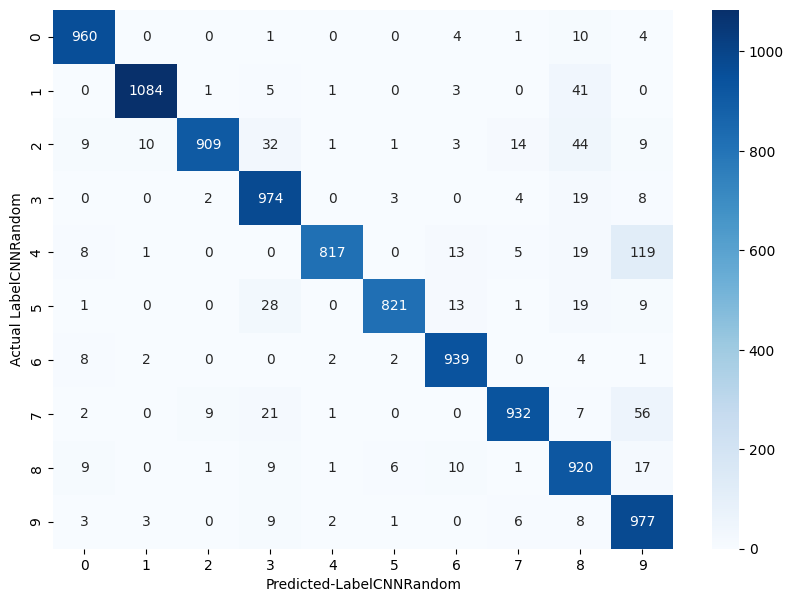

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns # For a pretty heatmap

# 1. Collect all labels and all predictions from your test loop
# all_labels = [0, 1, 2...]
# all_preds  = [1, 2, 0...]
all_labelsCNNCPU = all_labelsCNNRandom.cpu().numpy()
all_predCNNCPU = all_predCNNRandom.cpu().numpy()
cm = confusion_matrix(all_labelsCNNCPU, all_predCNNCPU)

# 2. Plot it as a Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted-LabelCNNRandom')
plt.ylabel('Actual LabelCNNRandom')
plt.show()

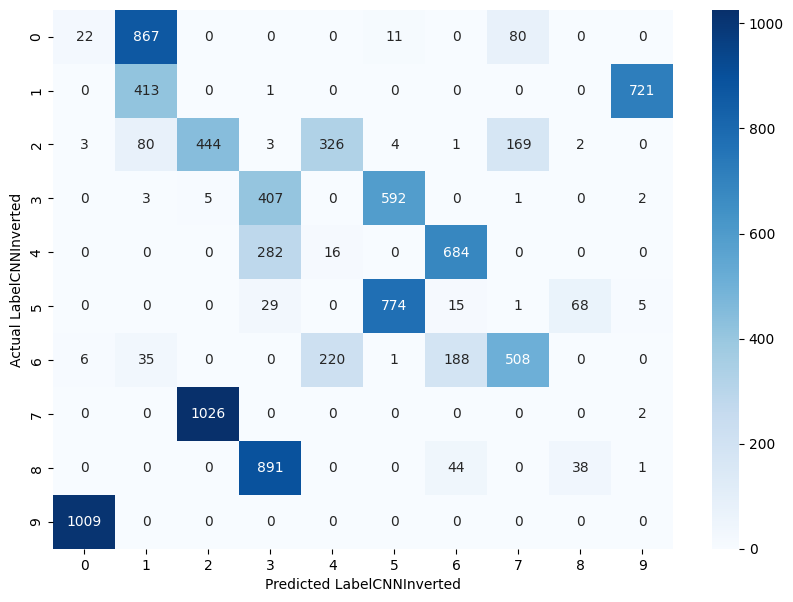

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns # For a pretty heatmap
import matplotlib.pyplot as plt

# 1. Collect all labels and all predictions from your test loop
# all_labels = [0, 1, 2...]
# all_preds  = [1, 2, 0...]
all_labelsCNNCPU = all_labelsCNNInverted.cpu().numpy()
all_predCNNCPU = all_predCNNInverted.cpu().numpy()
cm = confusion_matrix(all_labelsCNNCPU, all_predCNNCPU)

# 2. Plot it as a Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted LabelCNNInverted')
plt.ylabel('Actual LabelCNNInverted')
plt.show()



> **Resnet18 Model**



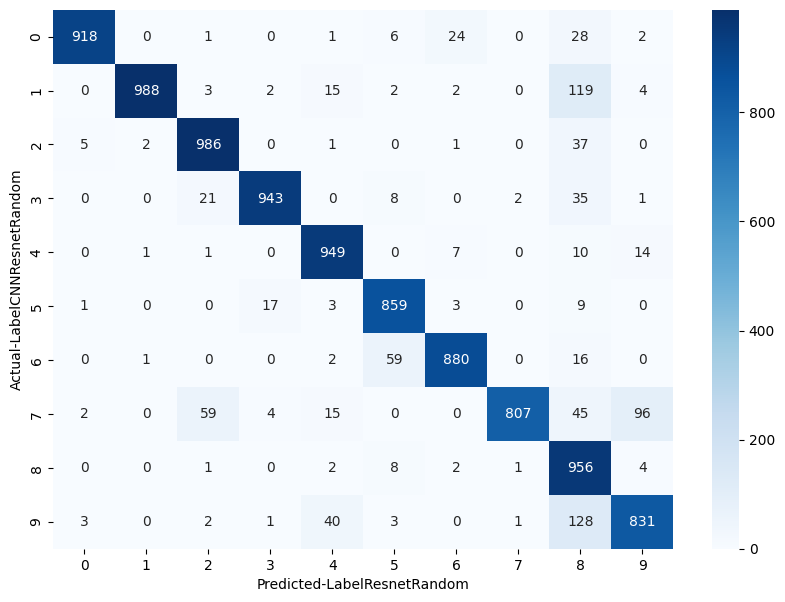

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns # For a pretty heatmap

# 1. Collect all labels and all predictions from your test loop
# all_labels = [0, 1, 2...]
# all_preds  = [1, 2, 0...]
all_labelsCNNCPU = all_labelsRandomResnet.cpu().numpy()
all_predCNNCPU = all_predRandomResnet.cpu().numpy()
cm = confusion_matrix(all_labelsCNNCPU, all_predCNNCPU)

# 2. Plot it as a Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted-LabelResnetRandom')
plt.ylabel('Actual-LabelCNNResnetRandom')
plt.show()

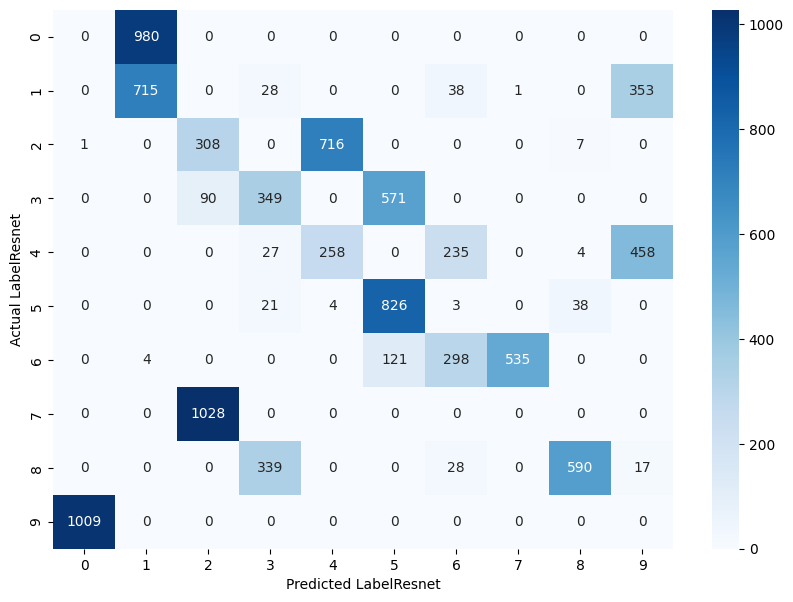

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns # For a pretty heatmap

# 1. Collect all labels and all predictions from your test loop
# all_labels = [0, 1, 2...]
# all_preds  = [1, 2, 0...]
all_labelsResnetCPU = all_labelsResnetInverted.cpu().numpy()
all_predResnetCPU = all_predResnetInverted.cpu().numpy()
cm = confusion_matrix(all_labelsResnetCPU, all_predResnetCPU)

# 2. Plot it as a Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted LabelResnet')
plt.ylabel('Actual LabelResnet')
plt.show()



> **BG Models(CNN-BG-model,Resnet18BG-model)**



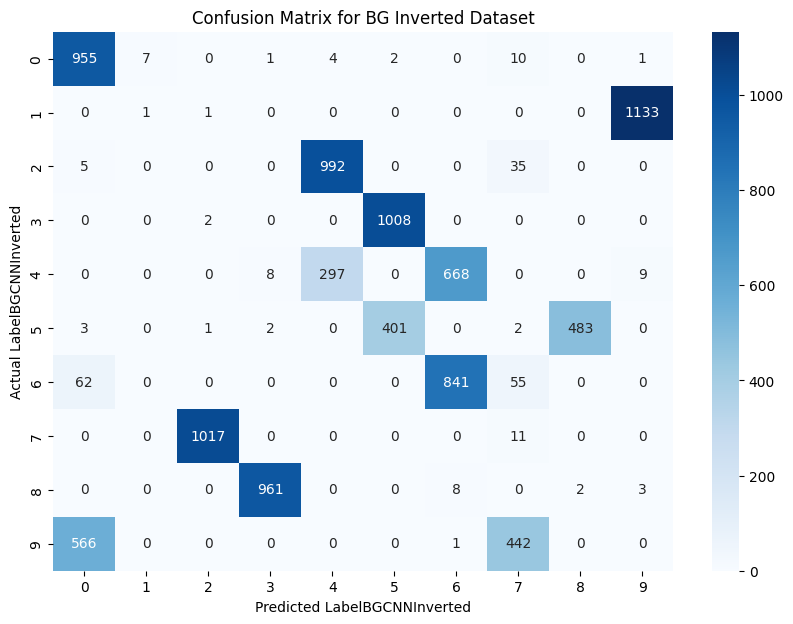

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns # For a pretty heatmap
import matplotlib.pyplot as plt

# 1. Collect all labels and all predictions from your test loop
# all_labels = [0, 1, 2...]
# all_preds  = [1, 2, 0...]
all_labelsCNNCPU = all_labelsBGCNNInverted.cpu().numpy()
all_predCNNCPU = all_predBGCNNInverted.cpu().numpy()
cm = confusion_matrix(all_labelsCNNCPU, all_predCNNCPU)

# 2. Plot it as a Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for BG Inverted Dataset')
plt.xlabel('Predicted LabelBGCNNInverted')
plt.ylabel('Actual LabelBGCNNInverted')
plt.show()

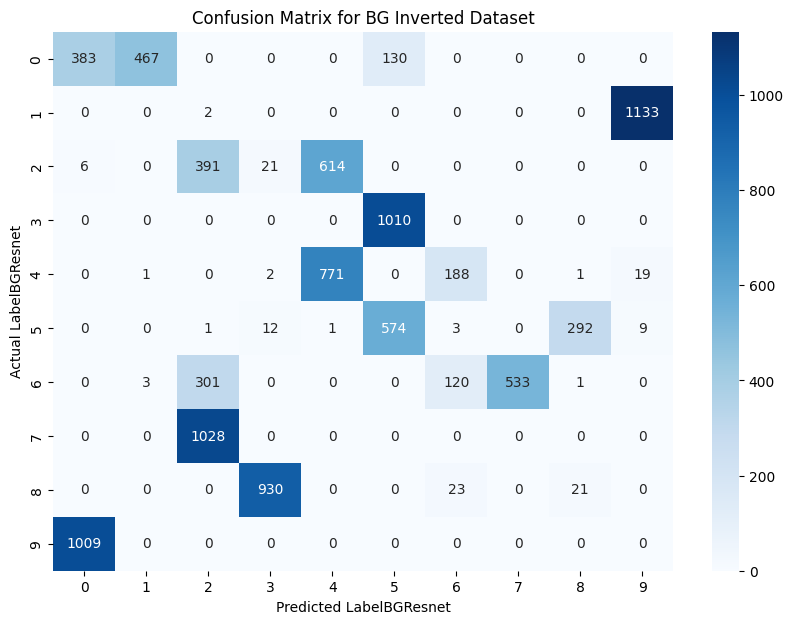

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns # For a pretty heatmap

# 1. Collect all labels and all predictions from your test loop
# all_labels = [0, 1, 2...]
# all_preds  = [1, 2, 0...]
all_labelsResnetCPU = all_labelsResnetBGInverted.cpu().numpy()
all_predResnetCPU = all_predResnetBGInverted.cpu().numpy()
cm = confusion_matrix(all_labelsResnetCPU, all_predResnetCPU)

# 2. Plot it as a Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for BG Inverted Dataset')
plt.xlabel('Predicted LabelBGResnet')
plt.ylabel('Actual LabelBGResnet')
plt.show()

In [ ]:
# analysis
outputs.shape

torch.Size([32, 10])

In [ ]:
predicted.shape

torch.Size([16])

Text(0.5, 1.0, 'LabelRandomColoredCNN: 9')

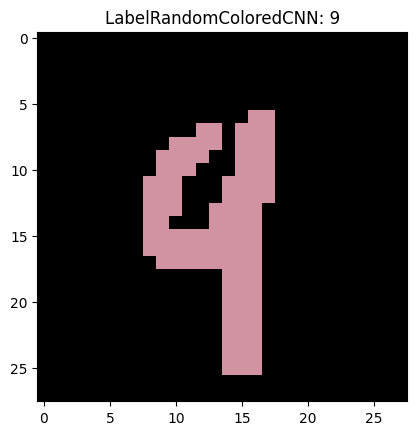

In [ ]:
# analysis for random-colored  test-set
import matplotlib.pyplot as plt
OneImg = images[1].detach().cpu().permute(1,2,0)
plt.imshow(OneImg)
plt.title(f"LabelRandomColoredCNN: {predicted[1]}")

In [ ]:
outputsRandomCNN[1]

tensor([ -7.9770,  -5.8993, -10.4574,  -1.6715,   0.4895,  -5.9633,  -7.4908,
         -4.0773,  -0.9746,   5.0341], device='cuda:0')

In [ ]:
labels

tensor([6, 4, 1, 4, 2, 7, 3, 7, 9, 1, 3, 5, 8, 6, 8, 0], device='cuda:0')

In [ ]:
predicted

tensor([6, 9, 1, 9, 3, 7, 3, 7, 9, 1, 3, 5, 8, 6, 8, 0], device='cuda:0')

In [ ]:
images.shape

torch.Size([16, 3, 28, 28])

Text(0.5, 1.0, 'InvertedDatasetLabelCNN: 0')

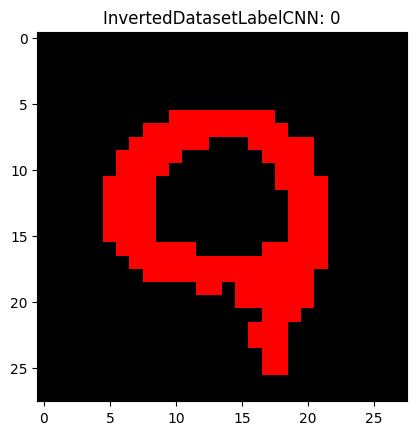

In [ ]:
# analysis for random-colored  test-set
import matplotlib.pyplot as plt
OneImg = Invertedimages[3].detach().cpu().permute(1,2,0)
plt.imshow(OneImg)
plt.title(f"InvertedDatasetLabelCNN: {predictedInvert[3]}")

In [ ]:
outputsInvertedCNN[3]

tensor([ 12.2276, -14.5119, -29.8794,  -8.2914,  -5.9938, -22.1081,  -1.0983,
         -3.0016, -14.9171, -12.0820], device='cuda:0')

In [ ]:
Invertedlabels

tensor([5, 0, 5, 9, 8, 3, 1, 3, 8, 4, 7, 2, 6, 5, 6, 5], device='cuda:0')

In [ ]:
predictedInvert

tensor([5, 1, 5, 0, 3, 5, 9, 5, 3, 6, 2, 4, 7, 5, 7, 5], device='cuda:0')

Text(0.5, 1.0, 'RandomColoredDatasetLabelResnet: 2')

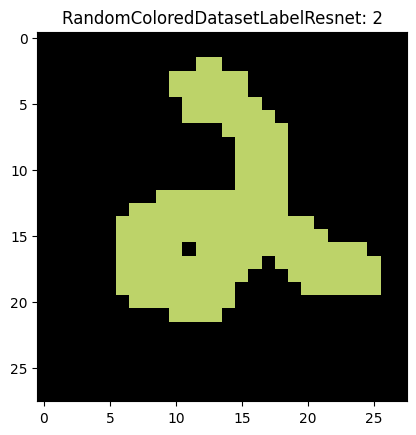

In [ ]:
# analysis for random-colored  test-set
import matplotlib.pyplot as plt
OneImg = imagesResnet[0].detach().cpu().permute(1,2,0)
plt.imshow(OneImg)
plt.title(f"RandomColoredDatasetLabelResnet: {predictedResnet[0]}")

In [ ]:
outputsRandomResnet[0]

tensor([ -5.5416,   2.8546,  12.3715,  -3.0329,  -5.2412, -10.8949,  -7.2078,
         -1.9265,  -2.6595,  -8.1832], device='cuda:0')

In [ ]:
labelsResnet

tensor([2, 0, 7, 2, 6, 6, 6, 4, 0, 6, 0, 5, 3, 1, 4, 8], device='cuda:0')

In [ ]:
predictedResnet

tensor([2, 0, 7, 2, 6, 6, 6, 4, 0, 6, 0, 5, 3, 1, 4, 7], device='cuda:0')

In [ ]:
labelsResnetInverted

tensor([3, 1, 9, 5, 0, 4, 4, 4, 0, 8, 1, 6, 4, 1, 2, 4], device='cuda:0')

In [ ]:
predictedResnetInverted

tensor([5, 1, 0, 5, 1, 9, 9, 6, 1, 3, 1, 7, 3, 1, 4, 6], device='cuda:0')

Text(0.5, 1.0, 'InvertedColoredDatasetLabelResnet: 5')

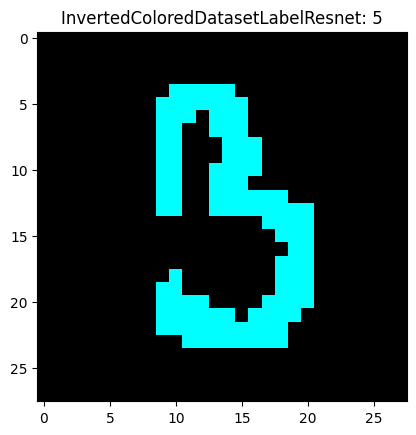

In [ ]:
# analysis for random-colored  test-set
import matplotlib.pyplot as plt
OneImg = imagesResnetInverted[0].detach().cpu().permute(1,2,0)
plt.imshow(OneImg)
plt.title(f"InvertedColoredDatasetLabelResnet: {predictedResnetInverted[0]}")

In [ ]:
outputsInvertedResnet[5]

tensor([-3.8836, -3.6728, -2.3809, -0.1235,  0.3066, -4.5197, -1.7133, -1.8544,
        -0.1757,  1.8124], device='cuda:0')

In [ ]:
save_path1 = '/content/drive/MyDrive/Colab Notebooks/3-simpleCNNmodelSaved.pth'

save_path2 = '/content/drive/MyDrive/Colab Notebooks/Resnet18modelSaved.pth'

# Save the weights
torch.save(simple_model.state_dict(), save_path1)
torch.save(resnet18.state_dict(), save_path2)

In [ ]:
save_path3 = '/content/drive/MyDrive/Colab Notebooks/Resnet18BGmodelSaved.pth'
save_path4 = '/content/drive/MyDrive/Colab Notebooks/CNNBGmodelSaved.pth'
torch.save(simple_modelBG.state_dict(), save_path3)
torch.save(resnet18BG.state_dict(), save_path4)